In this assignment, I use machine learning to model the MNIST data. I  evaluate a linear model and SVC model

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import cv2

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score


from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier


# Downloading MNIST data 

In [2]:
from sklearn.datasets import fetch_openml

In [3]:
mnist = fetch_openml('mnist_784', version=1, cache=True, as_frame=False)
print(mnist.DESCR)

C:\Users\lidii\anaconda3\Lib\site-packages\sklearn\datasets\_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

In [4]:
X=mnist["data"]
y=mnist["target"].astype(np.uint8)

# Division of data into training, validation and test  and and standardizing them

In [5]:

X_train = X[:25000]
y_train = y[:25000]

X_val = X[26000:27000]
y_val = y[26000:27000]

X_test = X[28000:29000]
y_test = y[28000:29000]


In [6]:
# Standardizing the data (generally always should do when using SVM models).
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train) #fit and transform
X_val_scaled = scaler.transform(X_val)  # only transforming  
X_test_scaled = scaler.transform(X_test) # only transforming  

In [7]:
# Chack a label
y[0]

5

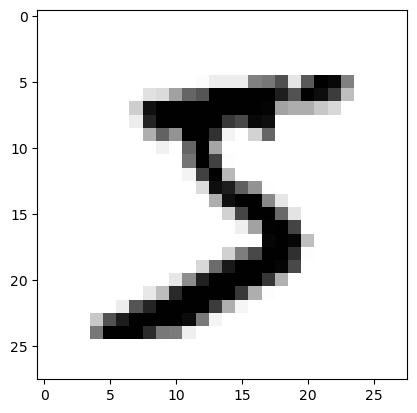

In [8]:
#Chack the image for the label
some_digit = X[0]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap=mpl.cm.binary)

In [9]:
print(X_train.shape)
print(y_train.shape)

(25000, 784)
(25000,)


# Creating a function to visualize the matrix:

In [10]:
def display_confusion_matrix(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    ConfusionMatrixDisplay(cm).plot()
    plt.show()

# Logistisk regression model

In [11]:
log_reg = LogisticRegression()

In [12]:
#Trening of  Logistisk regression model
log_reg.fit(X_train_scaled, y_train)

C:\Users\lidii\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [13]:
#Validation Logistisk regression model
y_val_pred_log=log_reg.predict(X_val_scaled)

In [14]:
#Checking the accuracy of the prediction of Logistisk regression model
accuracy_log = accuracy_score(y_val, y_val_pred_log)
print("Accuracy of Logistic Regression on validation data:", accuracy_log)


Accuracy of Logistic Regression on validation data: 0.897


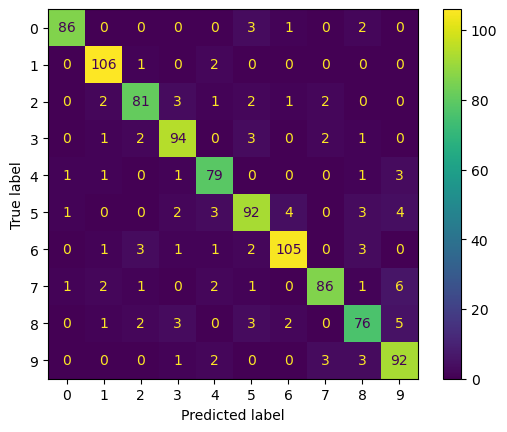

In [15]:
# Visualize the confusion matrix of Logistisk regression model
display_confusion_matrix(y_val, y_val_pred_log)

# Random Forest model

In [16]:

random_forest = RandomForestClassifier(n_estimators=500, max_leaf_nodes=2000, n_jobs=-1, random_state=42)

In [17]:
#Trening of  Random Forest model

random_forest.fit(X_train_scaled, y_train)

RandomForestClassifier(max_leaf_nodes=2000, n_estimators=500, n_jobs=-1,
                       random_state=42)

In [18]:
#Validation Random Forest model
y_val_pred_random_forest = random_forest.predict(X_val_scaled)


In [19]:
#Checking the accuracy of the prediction of Random Forest model
accuracy_random_forest = accuracy_score(y_val, y_val_pred_random_forest )
print("Accuracy of Random Forest on validation data:", accuracy_random_forest )

Accuracy of Random Forest on validation data: 0.956


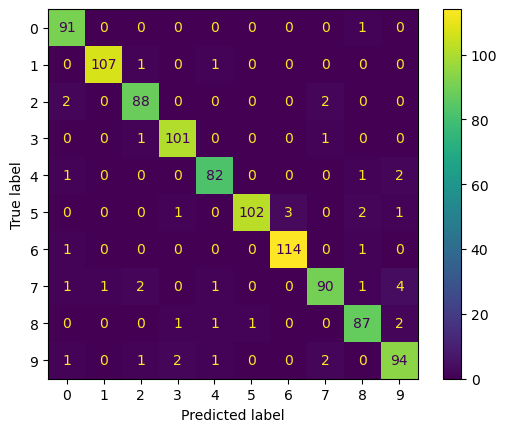

In [20]:
# Visualize the confusion matrix of Random Forest model
display_confusion_matrix(y_val, y_val_pred_random_forest)

# K-nearest neighbors (KNN)-model

In [21]:
knn = KNeighborsClassifier()

In [22]:
#Trening of  KNN model, hyperparameter selection
param_grid = {'n_neighbors': [ 2, 3, 5, 7, 10]}
grid_search_knn = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')


grid_search_knn.fit(X_train_scaled, y_train)

# Get the best value for n_neighbors
best_n_neighbors = grid_search_knn.best_params_['n_neighbors']
print("Best value for n_neighbors:", best_n_neighbors)

Best value for n_neighbors: 3


In [23]:
#Validation KNN-model
y_val_pred_knn = grid_search_knn.predict(X_val_scaled)

In [24]:
#Checking the accuracy of the prediction of KNN-model
accuracy_knn_val = accuracy_score(y_val, y_val_pred_knn)
print("Accuracy of KNN on validation data:",accuracy_knn_val)


Accuracy of KNN on validation data: 0.929


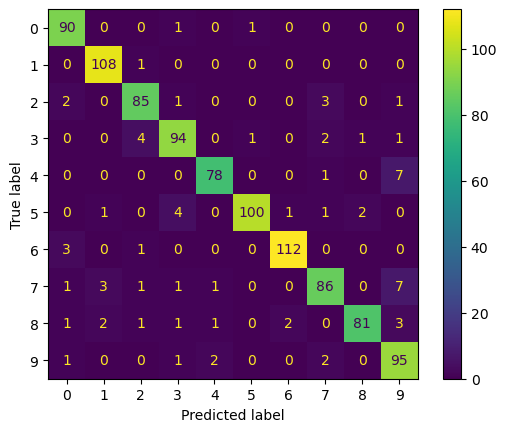

In [25]:
# Visualize the confusion matrix of KNN-model
display_confusion_matrix(y_val, y_val_pred_knn)

In [26]:
#Three model validation results table
data_tab = {
    "Accuracy of Logistic Regression on validation data": [accuracy_log],
    "Accuracy of Random Forest on validation data": [accuracy_random_forest], 
    "Accuracy of KNN on validation data": [accuracy_knn_val]
}

# Skapa DataFrame från datan
df_tab = pd.DataFrame(data_tab)



# Ange stil för tabellen
styler = df_tab.style.set_table_styles([{
    'selector': 'th',
    'props': [('background-color', '#f2f2f2'), ('color', 'black'), ('font-weight', 'bold'), ('text-align', 'center')]
}, {
    'selector': 'td',
    'props': [('text-align', 'center')]
}, {
    'selector': 'tr:nth-of-type(odd)',
    'props': [('background-color', '#f9f9f9')]
}, {
    'selector': 'tr:nth-of-type(even)',
    'props': [('background-color', 'white')]
}, {
    'selector': 'tr:hover',
    'props': [('background-color', '#f5f5f5')]
}])

# Visa tabellen
styler

,Accuracy of Logistic Regression on validation data,Accuracy of Random Forest on validation data,Accuracy of KNN on validation data
0,0.897000,0.956000,0.929000


The Random Forest model has the highest accuracy on the validation data but the KNN model also has a fairly high accuracy rate, so I will check the test data for both models

# Model Evaluation on Test Data

Checking test data for Random Forest:

In [27]:
#Random Forest model with test data
y_pred_test_rf = random_forest.predict(X_test_scaled)

In [28]:
#Compute accuracy score for Random Forest model (test data)
accuracy_test_rf = accuracy_score(y_test, y_pred_test_rf)
print("Accuracy Score on Test Data:", accuracy_test_rf)


Accuracy Score on Test Data: 0.957


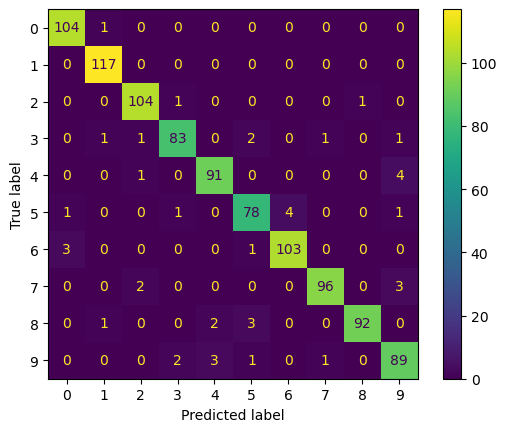

In [29]:
# Visualize the confusion matrix for Random Forest model (test data)
display_confusion_matrix(y_test, y_pred_test_rf)

Checking test data for K-nearest neighbors (KNN)-model:

In [30]:
#KNN model with test data
y_pred_test_knn = grid_search_knn.predict(X_test_scaled)

In [31]:
#Compute accuracy score for KNN model (test data)
accuracy_test_knn = accuracy_score(y_test, y_pred_test_knn)
print("Accuracy Score on Test Data:", accuracy_test_knn)

Accuracy Score on Test Data: 0.947


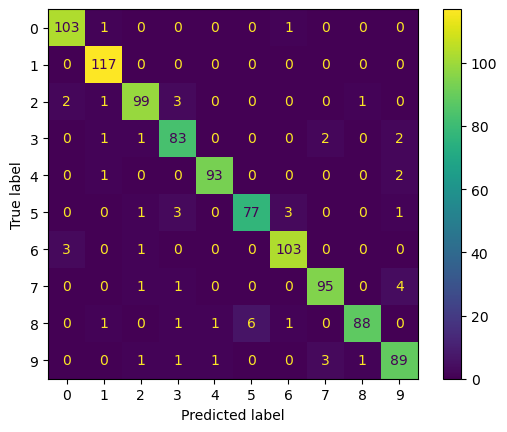

In [32]:
# Visualize the confusion matrix for KNN model (test data)
display_confusion_matrix(y_test, y_pred_test_knn)

The result of testing:                                                                

The accuracy Random Forest model (test data)=0.957

The accuracy K-nearest neighbors (KNN)-model (test data)=0.947

# My images

Checking models in photographs that I took myself:


In [33]:
#Image pre-processing

def preprocess_image(image_path):    
    
    # Load the image
    image = cv2.imread(image_path)
    
    # Convert to grayscale
    grayscale_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Transform the image to 28x28 pixels
    resized_image = cv2.resize(grayscale_image, (28, 28), interpolation=cv2.INTER_AREA)
    
  
    
 # Change the color of the pixels
    lower_pixel = 140  # Do not change black pixels to white
    upper_pixel = 160  # Change white pixels to black
    
    for i in range(resized_image.shape[0]):
        for j in range(resized_image.shape[1]):
            if resized_image[i, j] <= lower_pixel:
                resized_image[i, j] = 0
            elif resized_image[i, j] > upper_pixel:
                resized_image[i, j] = 255
                
    normalized_image = resized_image
    resized_image = cv2.bitwise_not( resized_image) #invert the pixel values

     
    
    # Flattens the image into a vector with 784 features
    flattened_image = resized_image.flatten().reshape(1, -1)
    
   
    
    return resized_image, normalized_image, flattened_image




In [34]:
#Getting an image from a folder
image_path = r"4.jpg"

In [35]:
#Image pre-processing
resized_image, normalized_image, flattened_image = preprocess_image(image_path)

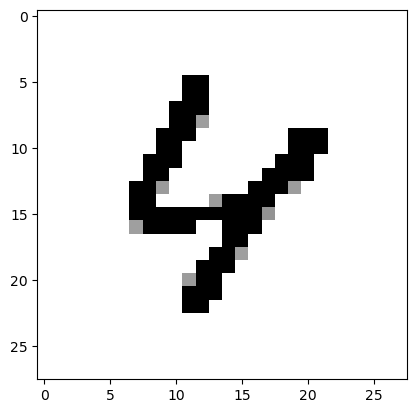

In [36]:
# Image after changing the color of the pixels
plt.imshow(normalized_image, cmap='gray')


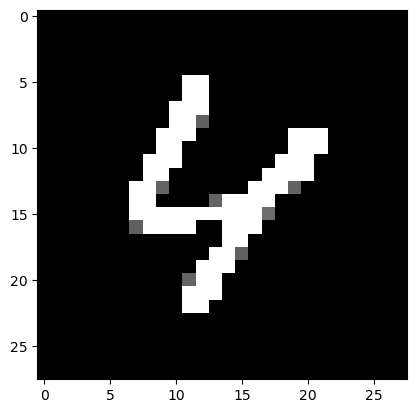

In [37]:
# Image after invert the pixel values
plt.imshow(resized_image, cmap='gray')

In [38]:
# Prediction av KNN-model on the preprocessed image

prediction_knn = grid_search_knn.predict(flattened_image)
print("Prediction knn:", prediction_knn)

Prediction knn: [4]


In [39]:
# Prediction av Random Forest model on the preprocessed image

prediction_rf = random_forest.predict(flattened_image)

print("Prediction Random Forest:", prediction_rf)

Prediction Random Forest: [8]


Checking the images that were taken and processed by me is shown that the KNN model reads the image much better than Random Forest.